In [3]:
import pandas as pd
import numpy as np

In [4]:
!pip install seaborn

#### Pivot Table
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional
summarization of the data.

In [5]:
import seaborn as sns

In [68]:
df=sns.load_dataset('tips')   #Tips is a toy or dummy dataset already in the seaborn library.
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [69]:
#Now let's say we want average bill as per the sex
df.groupby('sex')[['total_bill']].mean()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16924\2447251611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [70]:
#Now if I want to know how many smokers and non-smokers pay the bill accoridng to the gender
df.groupby(['sex','smoker'])[['total_bill']].mean()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16924\568914343.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean()


total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [74]:
#Using the Pivot Table

pd.pivot_table(df,index=['sex','smoker'],values='total_bill',aggfunc='mean')

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16924\540657274.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,index=['sex','smoker'],values='total_bill',aggfunc='mean')


total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [73]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16924\884363850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [78]:
pd.pivot_table(df,index='sex',columns='smoker',values='total_bill',aggfunc='mean')

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16924\4194546352.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,index='sex',columns='smoker',values='total_bill',aggfunc='mean')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [85]:
#If we want all the columns
pd.pivot_table(df,index='sex',columns='smoker',aggfunc='sum',values=['total_bill','tip','size'])

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16924\772935911.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,index='sex',columns='smoker',aggfunc='sum',values=['total_bill','tip','size'])


size          tip         total_bill         
smoker  Yes   No     Yes      No        Yes       No
sex                                                 
Male    150  263  183.07  302.00    1337.07  1919.75
Female   74  140   96.74  149.77     593.27   977.68

In [89]:
#Creating a Multiindex Dataframe
pd.pivot_table(df,index=['sex','smoker'],columns=['day','time'],values='total_bill',aggfunc='mean')

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16924\2066694104.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,index=['sex','smoker'],columns=['day','time'],values='total_bill',aggfunc='mean')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [90]:
pd.pivot_table(df,index=['sex','smoker'],columns=['day','time'],values=['total_bill','size','tip'],aggfunc={'size':'sum','total_bill':'mean','tip':'max'})

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16924\845355730.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,index=['sex','smoker'],columns=['day','time'],values=['total_bill','size','tip'],aggfunc={'size':'sum','total_bill':'mean','tip':'max'})


size                                                 tip  \
day            Thur          Fri          Sat          Sun         Thur   
time          Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner Lunch   
sex    smoker                                                             
Male   Yes       23      0     5     12     0     71     0     39  5.00   
       No        50      0     0      4     0     85     0    124  6.70   
Female Yes       17      0     6      8     0     33     0     10  5.00   
       No        60      2     3      2     0     30     0     43  5.17   

                                                total_bill                    \
day                    Fri           Sat    Sun       Thur               Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner      Lunch   
sex    smoker                                                                  
Male   Yes       NaN  2.20   4.73  10.00    6.5  19.171000    NaN  11.386667   
       No        NaN   NaN   3.50   9.00    6.0  18.486500    NaN        NaN   
Female Yes       NaN  3.48   4.30   6.50    4.0  19.218571    NaN  13.260000   
       No        3.0  3.00   3.25   4.67    5.2  15.899167  18.78  15.980000   

                                             
day                          Sat        Sun  
time           Dinner     Dinner     Dinner  
sex    smoker                                
Male   Yes     25.892  21.837778  26.141333  
       No      17.475  19.929063  20.403256  
Female Yes     12.200  20.266667  16.540000  
       No      22.750  19.003846  20.824286

In [94]:
#Margins 
pd.pivot_table(df,index=['sex','smoker'],columns='time',values='total_bill',aggfunc='mean',margins=True)

#Margin always creates a new columnn and a new row.

C:\Users\Abhi\AppData\Local\Temp\ipykernel_16924\2102884116.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,index=['sex','smoker'],columns='time',values='total_bill',aggfunc='mean',margins=True)


time               Lunch     Dinner        All
sex    smoker                                 
Male   Yes     17.374615  23.642553  22.284500
       No      18.486500  20.130130  19.791237
Female Yes     17.431000  18.215652  17.977879
       No      15.902400  20.004138  18.105185
All            17.168676  20.797159  19.785943

In [95]:
expense=pd.read_csv('expense_data.csv')
expense

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [103]:
expense['Date']=pd.to_datetime(expense['Date'],format='mixed',dayfirst=False)

In [106]:
expense['month']=expense['Date'].dt.month

In [108]:
pd.pivot_table(expense,index='month',columns='Category',values='INR',aggfunc='sum')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
1,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
2,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
3,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
11,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0
12,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0


<Axes: xlabel='month'>

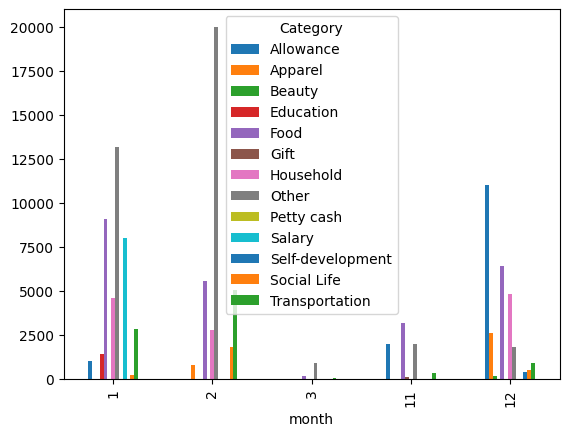

In [116]:
#Filling the NaN values
pd.pivot_table(expense,index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot(kind='bar')

### Vectorized String Operations

In [122]:
s=['cat','mat',None,'rat']
#I have to find out the words starting with letter c
func=lambda x:x.startswith('c')
list(filter(func,s))

#Even if we use the for loop it will still throw an error because None is not a string type.
#To counter such problems we have Vectorized String operations.

AttributeError: 'NoneType' object has no attribute 'startswith'

In [128]:
s=['cat','mat',None,'rat']
a=pd.Series(s)
#STR is a string accessor. Also, important to remember that str works element wise just like map or apply. But str is different as it is a 
#vectorized string.
a.str.startswith('c')
#As we can see, now it is not throwing an error due to the presence of None

0     True
1    False
2     None
3    False
dtype: object

In [129]:
titanic=pd.read_csv('titanic.csv')

In [130]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [135]:
titanic['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [136]:
titanic['Name'].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [137]:
titanic['Name'].str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [147]:
#Name of the character having the longest name characters
size=titanic['Name'].str.len().max()
titanic[titanic['Name'].str.len()==size]['Name']

307    Penasco y Castellana, Mrs. Victor de Satode (M...
Name: Name, dtype: object

In [150]:
#Strip
titanic['Name'].str.strip()    #IT removes any leading or following spaces

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [166]:
titanic['Name']
func=lambda x:x.split(',')[1]
list(map(func,titanic['Name']))

[' Mr. Owen Harris',
 ' Mrs. John Bradley (Florence Briggs Thayer)',
 ' Miss. Laina',
 ' Mrs. Jacques Heath (Lily May Peel)',
 ' Mr. William Henry',
 ' Mr. James',
 ' Mr. Timothy J',
 ' Master. Gosta Leonard',
 ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 ' Mrs. Nicholas (Adele Achem)',
 ' Miss. Marguerite Rut',
 ' Miss. Elizabeth',
 ' Mr. William Henry',
 ' Mr. Anders Johan',
 ' Miss. Hulda Amanda Adolfina',
 ' Mrs. (Mary D Kingcome) ',
 ' Master. Eugene',
 ' Mr. Charles Eugene',
 ' Mrs. Julius (Emelia Maria Vandemoortele)',
 ' Mrs. Fatima',
 ' Mr. Joseph J',
 ' Mr. Lawrence',
 ' Miss. Anna "Annie"',
 ' Mr. William Thompson',
 ' Miss. Torborg Danira',
 ' Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 ' Mr. Farred Chehab',
 ' Mr. Charles Alexander',
 ' Miss. Ellen "Nellie"',
 ' Mr. Lalio',
 ' Don. Manuel E',
 ' Mrs. William Augustus (Marie Eugenie)',
 ' Miss. Mary Agatha',
 ' Mr. Edward H',
 ' Mr. Edgar Joseph',
 ' Mr. Alexander Oskar',
 ' Mr. Hanna',
 ' Mr. Ernest Charles',
 ' M

In [180]:
#Get
#We want a seperate column of Mr., Mrs. and 

titanic['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)
#In split we have one parameter n. Let's say just likt the above example where we want to split only on the first space available, so we put n=1
#And expand=True will convert the series into the dataframe

,0,1
0,Mr.,Owen Harris
1,Mrs.,John Bradley (Florence Briggs Thayer)
2,Miss.,Laina
3,Mrs.,Jacques Heath (Lily May Peel)
4,Mr.,William Henry
...,...,...
886,Rev.,Juozas
887,Miss.,Margaret Edith
888,Miss.,"Catherine Helen ""Carrie"""
889,Mr.,Karl Howell


In [184]:
titanic[['title','firstname']]=titanic['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)

In [186]:
titanic['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Ms.            1
Mme.           1
Don.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [196]:
#replace
titanic['title']=titanic['title'].replace('Mlle.','Miss.')

In [195]:
titanic['title'].value_counts()

title
Mr.          517
Miss.        184
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mme.           1
Don.           1
Lady.          1
Ms.            1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [201]:

titanic[titanic['firstname'].str.upper().str.startswith('A')]['firstname']

13            Anders Johan
22            Anna "Annie"
35         Alexander Oskar
38           Augusta Maria
61                  Amelie
              ...         
842                Augusta
845                Anthony
866               Asuncion
875    Adele Kiamie "Jane"
876          Alfred Ossian
Name: firstname, Length: 95, dtype: object

In [207]:
#Search any John name
titanic[titanic['firstname'].str.upper()=='JOHN']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,firstname
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q,Mr.,John
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S,Mr.,John
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,Mr.,John
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S,Mr.,John
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q,Mr.,John
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S,Col.,John
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S,Mr.,John
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q,Mr.,John
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S,Rev.,John


In [210]:
#Method -2 

titanic[titanic['firstname'].str.contains('john',case=False)]   #This method is more accurate.
#Also, case = False means we don't want any case sentivity, either capital or small any john is fine.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,firstname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,John Bradley (Florence Briggs Thayer)
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Mrs.,William John Robert (Dorothy Ann Wonnacott)
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Mr.,William John
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Mrs.,John T (Ada Julia Bone)
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,Mr.,David John
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Mr.,William John Robert
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,Mr.,John Hatfield
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,Mr.,John Viktor
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Master.,"Frank John William ""Frankie"""
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Mr.,John D


In [219]:
#Find the firstnames whose name starts and ends with vowels
vowles=['a','e','i','o','u']
titanic[titanic['firstname'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,firstname
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Master.,Eugene
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.00,2,0,345764,18.0000,NaN,S,Miss.,Augusta Maria
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.0000,B28,NaN,Miss.,Amelie
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Mr.,Albert A
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S,Miss.,Erna Alexandra
80,81,0,3,"Waelens, Mr. Achille",male,22.00,0,0,345767,9.0000,NaN,S,Mr.,Achille
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,343120,7.6500,NaN,S,Miss.,Anna Kristine
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S,Miss.,Ellis Anna Maria
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Miss.,Anna
135,136,0,2,"Richard, Mr. Emile",male,23.00,0,0,SC/PARIS 2133,15.0458,NaN,C,Mr.,Emile


In [221]:
titanic[titanic['firstname'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,firstname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,John Bradley (Florence Briggs Thayer)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,William Henry
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.,James
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.,Timothy J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.,Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,Karl Howell


In [226]:
#Slicing

titanic['Name'].str[:4]

0      Brau
1      Cumi
2      Heik
3      Futr
4      Alle
       ... 
886    Mont
887    Grah
888    John
889    Behr
890    Dool
Name: Name, Length: 891, dtype: object

In [228]:
titanic['Name'].str[::-1]    #reverse

0                                sirraH newO .rM ,dnuarB
1      )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                 aniaL .ssiM ,nenikkieH
3           )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                               yrneH mailliW .rM ,nellA
                             ...                        
886                                sazouJ .veR ,alivtnoM
887                         htidE teragraM .ssiM ,maharG
888             "eirraC" neleH enirehtaC .ssiM ,notsnhoJ
889                                llewoH lraK .rM ,rheB
890                                  kcirtaP .rM ,yelooD
Name: Name, Length: 891, dtype: object